In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

file_path = r'C:\Users\annab\OneDrive\Documentos\GitHub\Colabs\RN\breast-cancer-wisconsin.data'
df = pd.read_csv(file_path, header=None)

columns = ['id', 'clump_thickness', 'uniformity_of_cell_size', 'uniformity_of_cell_shape', 'marginal_adhesion',
           'single_epithelial_cell_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']

df.columns = columns

df.replace('?', pd.NA, inplace=True)

df = df.dropna()

df = df.drop(['id', 'class'], axis=1)

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

columns_adjusted = ['clump_thickness', 'uniformity_of_cell_size', 'uniformity_of_cell_shape', 'marginal_adhesion',
                    'single_epithelial_cell_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses']

data_normalized = pd.DataFrame(df_scaled, columns=columns_adjusted)
data_normalized

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
0,0.444444,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000
1,0.444444,0.333333,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.000000
2,0.222222,0.000000,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.000000
3,0.555556,0.777778,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.000000
4,0.333333,0.000000,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
678,0.222222,0.000000,0.000000,0.000000,0.222222,0.111111,0.000000,0.000000,0.000000
679,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000
680,0.444444,1.000000,1.000000,0.222222,0.666667,0.222222,0.777778,1.000000,0.111111
681,0.333333,0.777778,0.555556,0.333333,0.222222,0.333333,1.000000,0.555556,0.000000


In [3]:
from minisom import MiniSom
import matplotlib.pyplot as plt

som = MiniSom(
    x=10,
    y=10,
    input_len=data_normalized.shape[1],
    sigma=1.0,
    learning_rate=0.5,
    neighborhood_function='mexican_hat',
    random_seed=42,
    activation_distance='cosine'
)
som.train_random(data_normalized.values, num_iteration=200, verbose=True)

 [ 200 / 200 ] 100% - 0:00:00 left 
 quantization error: 0.4812799471937444


# Modelo 1

In [4]:
from minisom import MiniSom
import matplotlib.pyplot as plt

som = MiniSom(
    x=10,
    y=10,
    input_len=data_normalized.shape[1],
    sigma=1.0,
    learning_rate=0.5,
    neighborhood_function='mexican_hat',
    random_seed=42,
    activation_distance='cosine'
)
som.train_random(data_normalized.values, num_iteration=200, verbose=True)

 [ 200 / 200 ] 100% - 0:00:00 left 
 quantization error: 0.4812799471937444


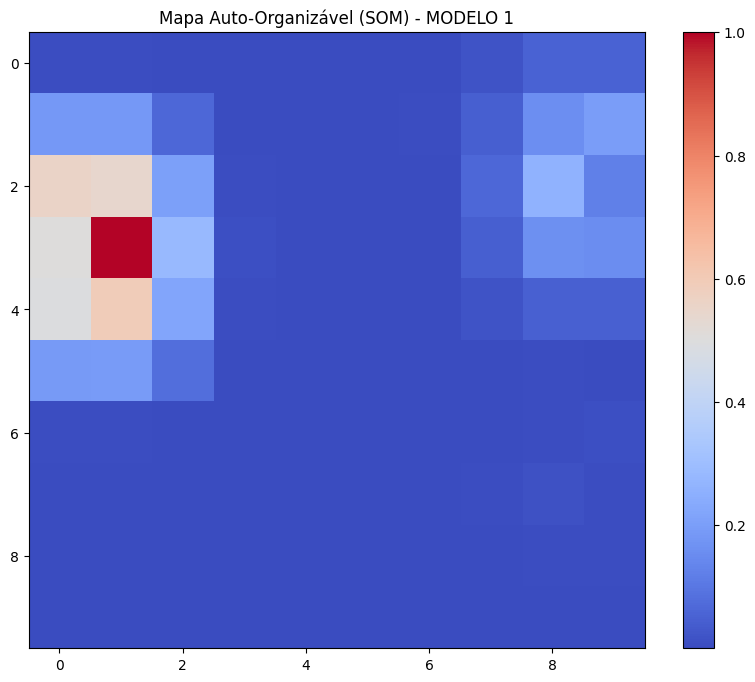

In [5]:
distance_map = som.distance_map()

plt.figure(figsize=(10, 8))
plt.imshow(distance_map, cmap='coolwarm')
plt.colorbar()
plt.title('Mapa Auto-Organizável (SOM) - MODELO 1')
plt.show()

In [6]:
import numpy as np
import pandas as pd

def analise_descritiva(som, df_scaled):
    win_map = som.win_map(df_scaled)

    analise_data = []

    for i in range(som.get_weights().shape[0]):
        for j in range(som.get_weights().shape[1]):
            group_data = win_map[(i, j)]
            group_size = len(group_data)
            if group_size > 0:
                mean_values = np.mean(group_data, axis=0)
                std_values = np.std(group_data, axis=0)

                analise_data.append({
                    "Grupo": f"({i},{j})",
                    "Número de Elementos": group_size,
                    "Média": mean_values,
                    "Desvio Padrão": std_values
                })

    analise_df = pd.DataFrame(analise_data)

    return analise_df

analise_df = analise_descritiva(som, df_scaled)
analise_df.head()

,Grupo,Número de Elementos,Média,Desvio Padrão
0,"(0,0)",4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
1,"(0,5)",1,"[0.0, 0.0, 0.0, 0.1111111111111111, 0.0, 0.222...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
2,"(1,5)",47,"[0.35697399527186746, 0.18439716312056734, 0.2...","[0.3005433921344724, 0.1879990104214756, 0.204..."
3,"(2,5)",1,"[0.0, 0.0, 0.0, 0.1111111111111111, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
4,"(2,9)",246,"[0.341011743450768, 0.022583559168925016, 0.03...","[0.15157926101671057, 0.06250058651696434, 0.0..."


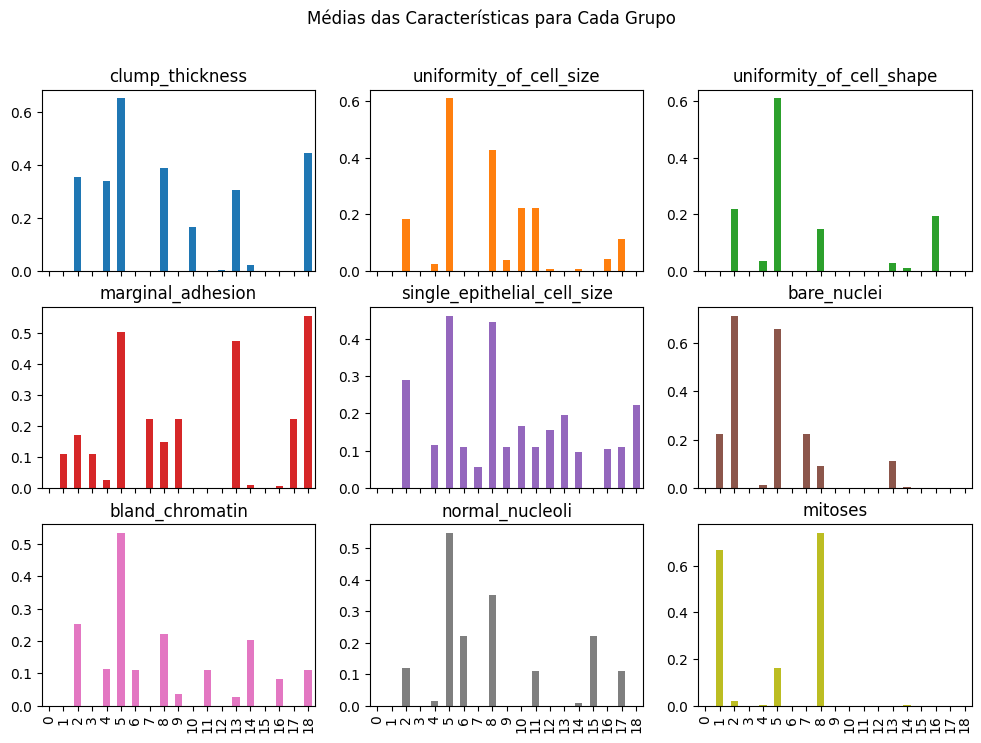

In [7]:
import matplotlib.pyplot as plt

mean_values = analise_df['Média'].apply(pd.Series)
mean_values.columns = columns_adjusted

mean_values.plot(kind='bar', figsize=(12, 8), subplots=True, layout=(3, 3), legend=False)
plt.suptitle('Médias das Características para Cada Grupo')
plt.show()


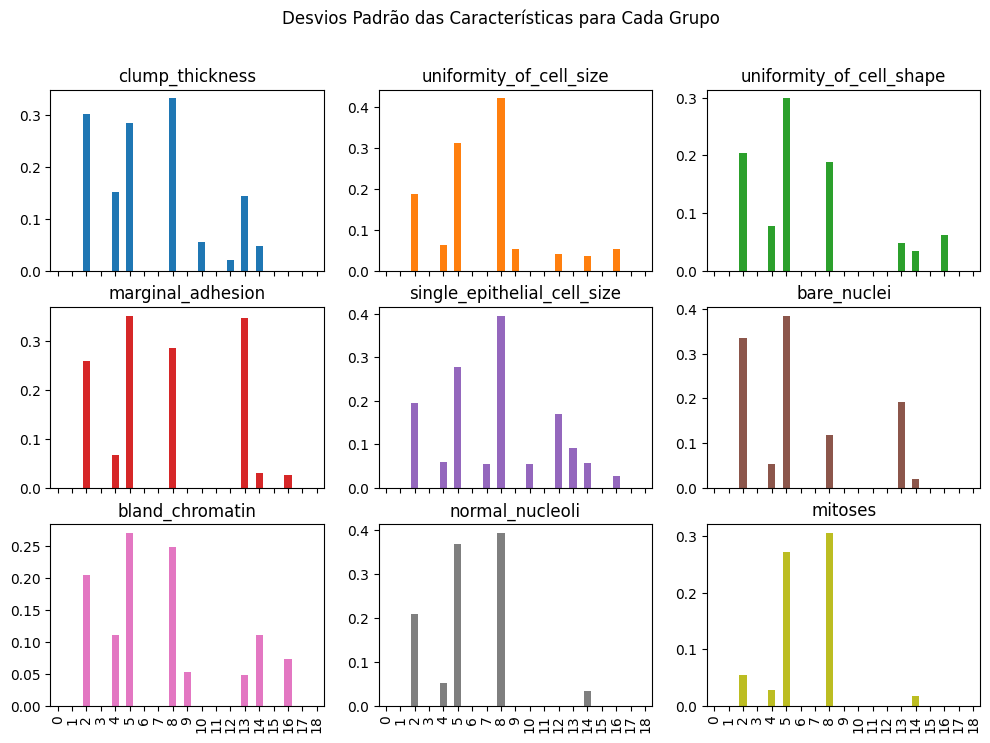

In [8]:
std_values = analise_df['Desvio Padrão'].apply(pd.Series)
std_values.columns = columns_adjusted

std_values.plot(kind='bar', figsize=(12, 8), subplots=True, layout=(3, 3), legend=False)
plt.suptitle('Desvios Padrão das Características para Cada Grupo')
plt.show()

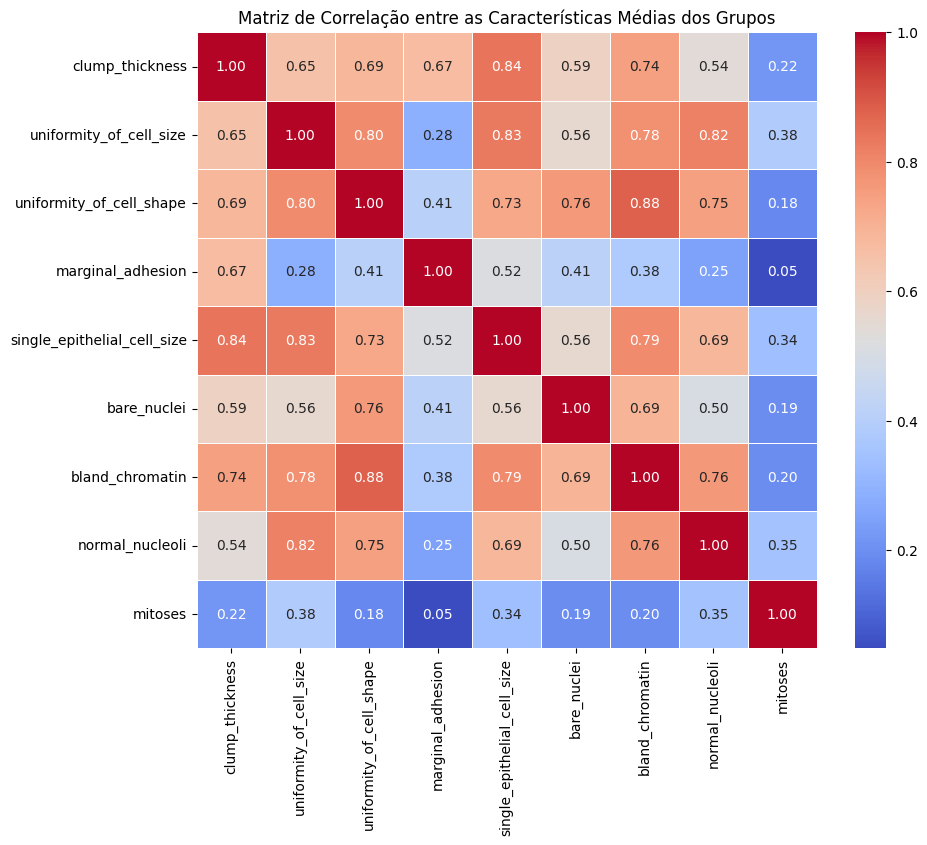

In [9]:
import seaborn as sns

corr_matrix = mean_values.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação entre as Características Médias dos Grupos')
plt.show()

# Modelo 2

In [10]:
from minisom import MiniSom
import matplotlib.pyplot as plt
import numpy as np

In [11]:
models_params = [
    {"x": 10, "y": 10, "input_len": df_scaled.shape[1], "sigma": 1.0, "learning_rate": 0.5, "neighborhood_function": 'mexican_hat', "random_seed": 42, "activation_distance": 'cosine'},
    {"x": 10, "y": 10, "input_len": df_scaled.shape[1], "sigma": 0.8, "learning_rate": 0.3, "neighborhood_function": 'gaussian', "random_seed": 42, "activation_distance": 'euclidean'},
    {"x": 15, "y": 15, "input_len": df_scaled.shape[1], "sigma": 1.0, "learning_rate": 0.5, "neighborhood_function": 'mexican_hat', "random_seed": 42, "activation_distance": 'euclidean'},
    {"x": 10, "y": 10, "input_len": df_scaled.shape[1], "sigma": 2.0, "learning_rate": 0.5, "neighborhood_function": 'gaussian', "random_seed": 42, "activation_distance": 'cosine'},
    {"x": 10, "y": 10, "input_len": df_scaled.shape[1], "sigma": 1.0, "learning_rate": 0.9, "neighborhood_function": 'mexican_hat', "random_seed": 42, "activation_distance": 'euclidean'}
]

In [15]:
def generate_umatrix(params, data):
    som = MiniSom(x=params["x"], y=params["y"], input_len=params["input_len"], sigma=params["sigma"],
                  learning_rate=params["learning_rate"], random_seed=params["random_seed"])

    som.train(data, 1000, verbose=False)
    umatrix = som.distance_map()

    return umatrix

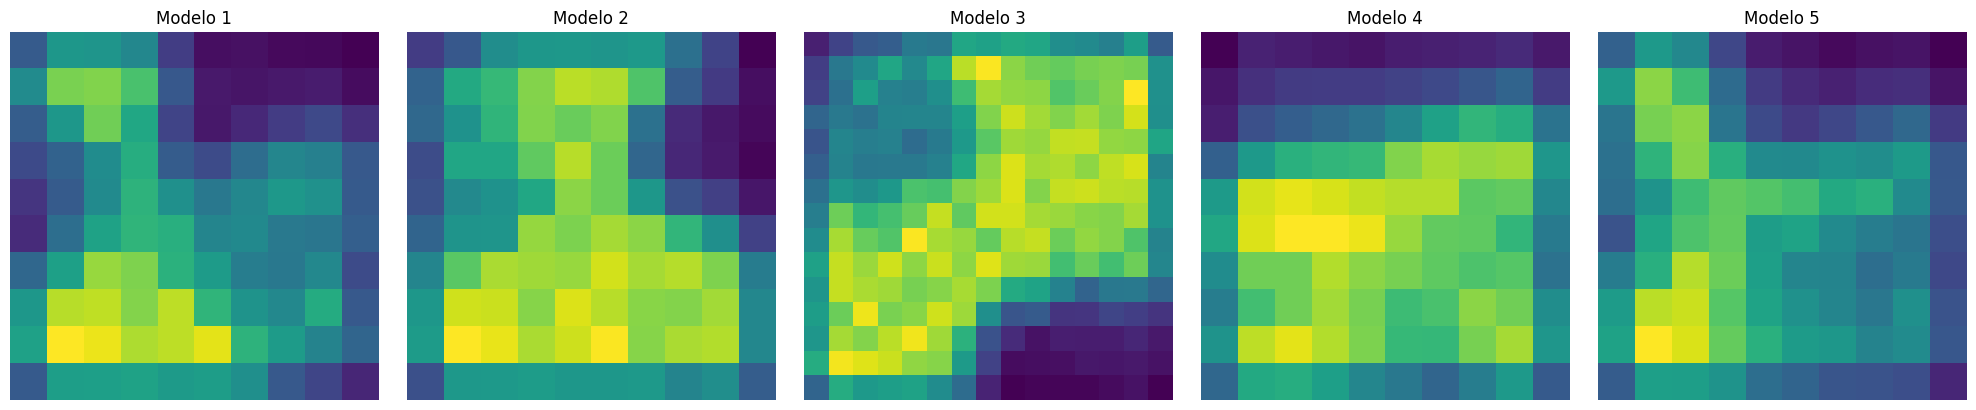

In [16]:
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i, params in enumerate(models_params):
    umatrix = generate_umatrix(params, df_scaled)
    ax = axes[i]
    ax.imshow(umatrix, cmap='viridis', interpolation='none')
    ax.set_title(f"Modelo {i+1}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [17]:
def count_groups(params, data):
    som = MiniSom(x=params["x"], y=params["y"], input_len=params["input_len"], sigma=params["sigma"],
                  learning_rate=params["learning_rate"], random_seed=params["random_seed"])

    som.train(data, 1000, verbose=False)

    groups = {f"Grupo {i+1}": {"elements": []} for i in range(params["x"] * params["y"])}

    for sample in data:
        winning_neuron = som.winner(sample) 
        group_index = winning_neuron[0] * params["y"] + winning_neuron[1] 
        groups[f"Grupo {group_index+1}"]["elements"].append(sample)

    num_groups = sum(1 for group in groups.values() if group["elements"]) 

    return num_groups


In [18]:
models_group_count = []

for i, params in enumerate(models_params):
    num_groups = count_groups(params, df_scaled)
    models_group_count.append(num_groups)

for i, num_groups in enumerate(models_group_count):
    print(f"Modelo {i+1} gerou {num_groups} grupos.")

Modelo 1 gerou 58 grupos.
Modelo 2 gerou 35 grupos.
Modelo 3 gerou 72 grupos.
Modelo 4 gerou 98 grupos.
Modelo 5 gerou 69 grupos.
